In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("Processed_Test_00{}.csv".format(1))
df.head()

,ID,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,142
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,141
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,140
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,139
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,138


In [4]:
def give_Test_engine(Test_no,engine_id):
    "Test_no, is the Sl.no of Test-set"
    "engine_id, is the ID of engine"
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Test_00{}.csv".format(Test_no))
    test = df[df['ID']==engine_id]
    test = test.drop(columns=['ID'])
    X_test=test.iloc[:,:-1]
    y_test=test.iloc[:,-1]
    return X_test,y_test

In [5]:
def give_Train_engine(Train_no,engine_id):
    "Train_no, is the Sl.no of Train-set"
    "engine_id, is the ID of engine"
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    train = df[df['ID']==engine_id]
    train = train.drop(columns=['ID'])
    X_train=train.iloc[:,:-1]
    y_train=train.iloc[:,-1]
    return X_train,y_train

# Importing all the training data

In [6]:
df1 = pd.read_csv('Processed_Train_001.csv')


df=pd.concat([df1])

# Dividing into Features and Target

In [7]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

# Training a Random Forest Regression Model

In [40]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)
X_train

,ID,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82,122,642.36,1585.89,1403.37,554.17,2388.03,47.48,521.37,2388.05,8.4098,392,38.88,23.3777
16500,82,123,642.64,1582.04,1399.08,554.79,2388.00,47.15,522.09,2388.05,8.3746,392,38.89,23.3542
16501,82,124,642.21,1586.98,1404.83,554.11,2388.08,47.48,522.52,2388.00,8.4140,391,38.90,23.3692
16502,82,125,641.90,1594.28,1398.69,555.12,2388.00,47.12,522.38,2388.00,8.4058,391,38.99,23.4025


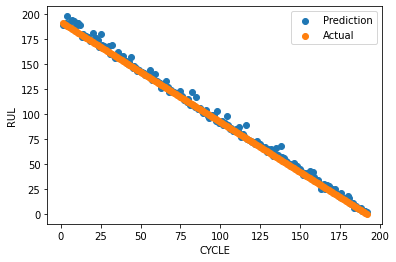

RMSE on Train set: 5.162918243976883


In [9]:
# Using the trained model to check the Training data
y_pred = regressor.predict(X_train)

# Plot the train data
plt.scatter(X_train['Cycle'][0:192],y_pred[0:192])
plt.scatter(X_train['Cycle'][0:192],np.array(y_train)[0:192])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.show()


print('RMSE on Train set:', np.sqrt(metrics.mean_squared_error(y_train ,y_pred)))

RMSE on Test set: 52.51544266309021


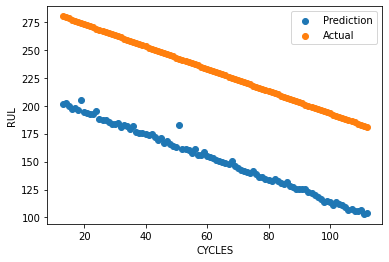

In [10]:
# Using the trained model to check the Test data
y_pred = regressor.predict(X_test)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plotting the test data
plt.scatter(X_test['Cycle'][100:200],y_pred[100:200])
plt.scatter(X_test['Cycle'][100:200],np.array(y_test)[100:200])
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()

In [11]:
y_pred = regressor.predict(X_test)
print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred_train = regressor.predict(X_train)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))


RMSE on Test set: 52.51544266309021
RMSE on Training set: 5.162918243976883


In [12]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [13]:
lreg.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred_reg = lreg.predict(X_test)
print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))

y_pred_train_reg = lreg.predict(X_train)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_reg)))


RMSE on Test set: 52.23758873315075
RMSE on Training set: 36.26551865919276


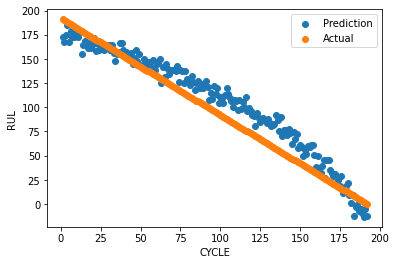

RMSE on Train set: 36.26551865919276


In [34]:
# Using the trained model to check the Training data
y_pred_train_reg = lreg.predict(X_train)

# Plot the train data
plt.scatter(X_train['Cycle'][0:192],y_pred_train_reg[0:192])
plt.scatter(X_train['Cycle'][0:192],np.array(y_train)[0:192])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.show()


print('RMSE on Train set:', np.sqrt(metrics.mean_squared_error(y_train ,y_pred_train_reg)))

RMSE on Test set: 52.23758873315075


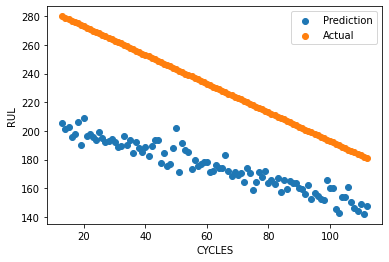

In [35]:
# Using the trained model to check the Test data
y_pred_reg = lreg.predict(X_test)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))

# Plotting the test data
plt.scatter(X_test['Cycle'][100:200],y_pred_reg[100:200])
plt.scatter(X_test['Cycle'][100:200],np.array(y_test)[100:200])
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)
Pmodel = LinearRegression()
Pmodel.fit(x_poly, y_train)

LinearRegression()

In [19]:
y_pred_poly = Pmodel.predict(x_poly_test)
print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

y_pred_train_poly = Pmodel.predict(x_poly)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_poly)))


RMSE on Test set: 119.37711017459462
RMSE on Training set: 29.257814710288272


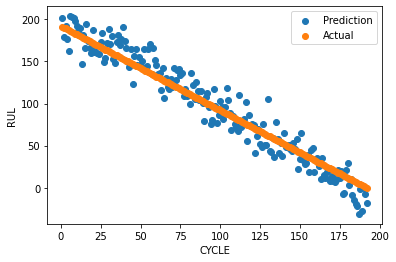

RMSE on Train set: 29.257814710288272


In [37]:
y_pred_train_poly = Pmodel.predict(x_poly)

# Plot the train data
plt.scatter(X_train['Cycle'][0:192],y_pred_train_poly[0:192])
plt.scatter(X_train['Cycle'][0:192],np.array(y_train)[0:192])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.show()


print('RMSE on Train set:', np.sqrt(metrics.mean_squared_error(y_train ,y_pred_train_poly)))

RMSE on Test set: 119.37711017459462


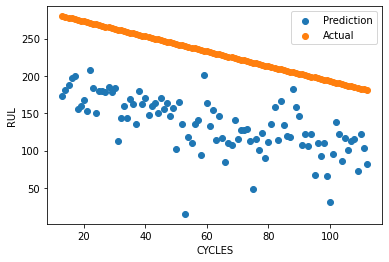

In [38]:
y_pred_poly = Pmodel.predict(x_poly_test)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

# Plotting the test data
plt.scatter(X_test['Cycle'][100:200],y_pred_poly[100:200])
plt.scatter(X_test['Cycle'][100:200],np.array(y_test)[100:200])
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()

In [39]:
df1 = pd.read_csv('Processed_Test_001.csv')
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]


        ID  Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  \
0        1      1          641.82         1589.70         1400.60   
1        1      2          642.15         1591.82         1403.14   
2        1      3          642.35         1587.99         1404.20   
3        1      4          642.35         1582.79         1401.87   
4        1      5          642.37         1582.85         1406.22   
...    ...    ...             ...             ...             ...   
20626  100    196          643.49         1597.98         1428.63   
20627  100    197          643.54         1604.50         1433.58   
20628  100    198          643.42         1602.46         1428.18   
20629  100    199          643.23         1605.26         1426.53   
20630  100    200          643.85         1600.38         1432.14   

       SensorMeasure7  SensorMeasure8  SensorMeasure11  SensorMeasure12  \
0              554.36         2388.06            47.47           521.66   
1              553.75

In [25]:
y_pred_test = regressor.predict(x)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y, y_pred_test)))

RMSE on Training set: 23.937519310086415


RMSE on Test set: 23.937519310086415


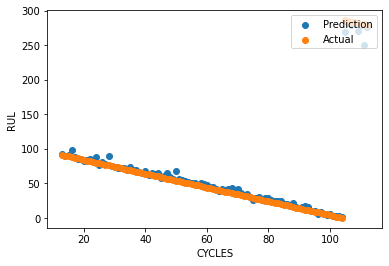

In [33]:
y_pred_reg = regressor.predict(x)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y, y_pred_reg)))

# Plotting the test data
plt.scatter(X_test['Cycle'][100:200],y_pred_reg[100:200])
plt.scatter(X_test['Cycle'][100:200],np.array(y)[100:200])
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()

In [26]:
y_pred_lreg = lreg.predict(x)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y, y_pred_lreg)))

RMSE on Training set: 39.97446965210165


RMSE on Test set: 39.97446965210165


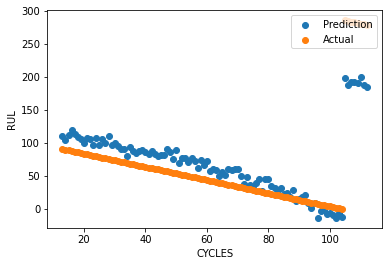

In [32]:
y_pred_lreg = lreg.predict(x)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y, y_pred_lreg)))

# Plotting the test data
plt.scatter(X_test['Cycle'][100:200],y_pred_lreg[100:200])
plt.scatter(X_test['Cycle'][100:200],np.array(y)[100:200])
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()